<a href="https://colab.research.google.com/github/luisjavierur/curso-ds/blob/main/Examen_1_LUIS_ULLOA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [254]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [255]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [256]:
path = "/content/drive/MyDrive/Curso - Data Science/Examenes/WA_Fn-UseC_-Telco-Customer-Churn.csv"

df = pd.read_csv(path)

# Empezamos a dar un vistazo general a la tabla.

In [257]:
#Damos una vista general para conocer las columnas, el total de datos, tipo de datos y si hay columnas que tienen o no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [258]:
# Limpiamos las columnas, quitando los espacios y dejandolos en minusculas para trabajar mas comodamene y evitar errores
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [259]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [260]:
# Usamos el metodo describe para tener estadisticas descriptivas de datos numericos
df.describe()

,seniorcitizen,tenure,monthlycharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


En la estadistica descriptiva podria llamar la atención la columna SeniorCitizen pero estos valores son 0 y 1 por lo que el valor maximo en este caso estaria correcto y no hay error

In [261]:
# Damos un vistazo general a la tabla
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Conociendo las columnas y los datos que se traen hay algunos que son numericos y segun el metodo ocupado info() estan como objects. Estos se podrian convertir a float o integer segun sea el caso para que no pueda generar problemas en caso de que se utilicen. Uno de ellos que esta como object es "totalCharges"

Al querer pasar directamente de object a float la columna da error. El error nos indica que hay valores vacios("") por lo que no deja.

Hacemos una exploracion de la columna, viendo los datos de menor a mayor

In [262]:
df["totalcharges"].sort_values()

,totalcharges
936,
3826,
4380,
753,
5218,
...,...
6646,997.75
5598,998.1
3686,999.45
3353,999.8


In [263]:
# Value counts para ver la cantidad que hay representado en texto o vacio
df["totalcharges"].value_counts()

,count
totalcharges,
,11
20.2,11
19.75,9
20.05,8
19.9,8
...,...
130.15,1
3211.9,1
7843.55,1


Podemos observar que hay valores que no tienen nada pero que aun asi los metodos de info() tomaban como si estuvieran correctos.

Para limpiarlo primero habria que quitarle los espacios y posteriormente cambiarle tipo de dato a float

In [264]:
# Quitamos los espacios de la columna TotalCharges ya que da error por que hay espacios en algunas filas

df["totalcharges"] = df["totalcharges"].str.strip()

# Convertimos la columna TotalCharges a float



Para pasar a float primero habra que limpiar las columnas que estan como texto vacio. En priori se puede pensar que podria ser 0 pero habra que buscar en la data algun tipo de relacion con otras columnas que talvez esten dejando vacia la columna "totalcharges"

In [265]:
# Visualizamos y filtramos la data por el totalcharges que solo sean vacios

df[df["totalcharges"] == ""].head(11)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


De acuerdo a la busqueda anterior, se puede observar que en varias columnas la informacion de cada fila varia. Lo unico que podria tener relacion seria "seniorcitizen" , "tenure" y "churn" Ya que en todas son iguales.

seniorcitizen no tiene mucho sentido porque solo refleja si el ciudadano es mayor o no.

tenure puede tener sentido ya que nos indica el numero de meses en que el cliente estuvo con la empresa.

churn tampoco tendria tanto sentido ya que es basicamente si se dio de baja o no. Pero indpendiente de eso el cargo deberia haber sido en teoria.



### Verificar

Hacemos un filtrado del tenure en 1 ya que refleja la cantidad de meses y corroboramos si existe alguna relacion. Entre la cantida de meses (tenure) y el total de cargos (totalcharges) de acuerdo a carga mensual (monthlycharges)

In [266]:
df[df["tenure"] == 1].head(20)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.2,Yes
33,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.2,No
34,3413-BMNZE,Male,1,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,No
70,2273-QCKXA,Male,0,No,No,1,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,No,Mailed check,49.05,49.05,No
80,5919-TMRGD,Female,0,No,Yes,1,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.35,79.35,Yes
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No
100,6380-ARCEH,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.2,No


Se puede observar en el filtrado anterior que los que tienen como tenure = 1 y tienen un cargo este correponde al calculo del mes en que estuvo el cliente con la empresa ya que "monthlycharges" es igual a "totalcharges"

Ya que los 11 valores que faltan de totalcharges corresponden a los clientes que no estuvieron ningun mes con la empresa y se comproboó ademas si existe alguna relación con las clientes que tuvieron 1 mes. Estos valores se cambiaran a 0.

Tal vez podria ser asi porque el cliente quizas estuvo con un periodo de prueba.



In [267]:
# Convertimos los valores de texto vacios a 0. Ocupamos replace ya que solo los valores que faltan con los que tienen tenure = 0

df["totalcharges"] = df["totalcharges"].replace("", "0")

In [268]:
# Verificamos si se limpio la data

df[df["tenure"] == 0].head(11)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,No


In [269]:
df["totalcharges"].value_counts()

,count
totalcharges,
0,11
20.2,11
19.75,9
20.05,8
19.9,8
...,...
130.15,1
3211.9,1
7843.55,1


Ya verificado que quedo limpio los datos vacios que tenia totalcharges procedemos a cambiar el tipo de dato

In [270]:
# Cambio tipo de dato a flotat

df["totalcharges"] = df["totalcharges"].astype(float)

In [271]:
# Verificmos
df["totalcharges"].dtype

dtype('float64')

In [272]:
# Verificamos si existen duplicados
df.duplicated().sum()

np.int64(0)

Ahora que esta limpio la data podemos pasar a exploracion y analisis de los datos

## Exploración de datos con Python


Visualizaremos en un grafico de bara saber la diferencia entre el tipo de contrato que tiene los clientes. Cual es el que mas o menos se suele contratar


In [273]:
# Comparacion entre los contratos

fig = px.histogram(
    df,
    x="contract",
    color="contract",
    barmode="stack",
    title="Distribución de las suscripciones por plazo de contrato",
    labels={
        "contract": "Plazo de contrato"
    },
    color_discrete_map={
        'Month-to-month': '#FFE3A9',
        'One year': '#725CAD',
        "Two year": '#8CCDEB'
    }
)
fig.update_layout(title_font_size=14)
fig.update_yaxes(title_text="Cantidad de clientes")
fig.show()


De acuerdo al grafico se puede observar que mas de la mitad de los clientes en comparacion con los otros prefieren contratar el plazo por mes. seguido de dos años y un año.

Posiblemente podría ser porque la gente no quiere gastar tanto dinero de una sola vez. Y sorpresivamente el contrato de dos años es mas preferido, esto puede ser por algún tipo de oferta o descuento que se hace y los clientes aprovechan.

In [274]:
fig = px.pie(
    df["gender"],
    names="gender",
    title="Porcentaje de clientes en base a su tipo de genero",
    hole=0.4
)
fig.update_layout(title_font_size=20)
fig.show()

Podemos observar que el porcentaje de mujeres y hombres que tiene la empresa como cliente son practicamente casi iguales. Los que mas contratan son ligeramente mas hombres. Pero no existe una diferencia notoria.

In [275]:
# Grafico agrupado entre contrato y su churn

fig = px.histogram(
    df,
    x="contract",
    color="churn",
    barmode='group',
    title="Churn por tipo de contrato",
    labels={
        'contract': 'Tipo de contrato',
    },
    color_discrete_map={
        'Yes': '#FFC107',
        'No': '#347433'
    }
)
fig.update_yaxes(title_text="Cantidad de clientes")
fig.show()

Observamos la relacion entre el tipo de contrato y el churn. Para conocer y analizar en cual de los contratos se da mas de baja o se mantiene.

Podemos visualizar que el tipo de contrato que tiene mas diferencia entre clientes que se mantienen y otros que se dan de baja es el de dos años.

Y el que tiene mas cantidad de clientes que se dan o no de baja es el "mes a mes"

Esto podria sueceder debido a que el mes a mes es mucho más facil darse de baja por lo cual es mas recurrente y ademas considerando que este tipo de contrato es el que tiene mas clientes suscritos.

En los tres tipos de contrato los clientes suelen siempre mantenerse que darse de baja.

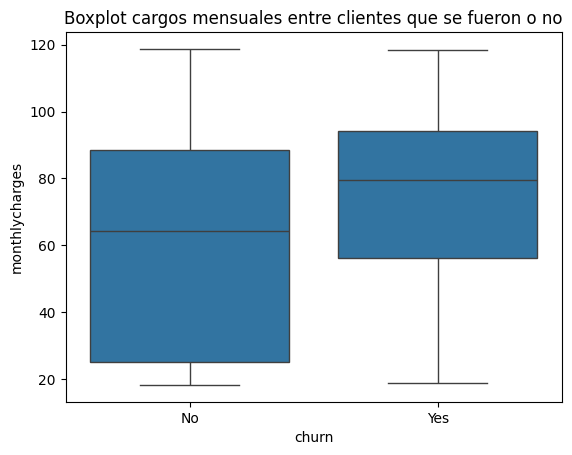

In [276]:
sns.boxplot(df, x="churn", y="monthlycharges")
plt.title("Boxplot cargos mensuales entre clientes que se fueron o no")
plt.show()

Utilizamos boxplot para comparar la distribucion de cargos mensuales de los clientes que se fueron o no.

Los que si se dieron de baja podemos ver que pagaban mucho mas que los que siguen como cliente.

Los clientes que no se fueorn tienen una mediana de cargos mensuales menores a los que si se fueron. Alredor de 63-65 frente a los 80 que pagaban los del otro grupo.

Y no se observan valores atipicos en ninguno de los dos